In [2]:
import pandas as pd
from IPython.display import display

In [3]:
covid_data = pd.read_csv('data\covid_data.csv')
display(covid_data.head())

,date,province/state,country,confirmed,deaths,recovered
0,01/22/2020,Anhui,China,1.0,0.0,0.0
1,01/22/2020,Beijing,China,14.0,0.0,0.0
2,01/22/2020,Chongqing,China,6.0,0.0,0.0
3,01/22/2020,Fujian,China,1.0,0.0,0.0
4,01/22/2020,Gansu,China,0.0,0.0,0.0


In [4]:
vaccinations_data=pd.read_csv('data\country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]
display(vaccinations_data)

,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.00,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
...,...,...,...,...,...,...,...,...,...
42790,Zimbabwe,2021-09-01,4270430.0,2615233.0,17.33,1655197.0,10.97,36416.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
42791,Zimbabwe,2021-09-02,4323735.0,2649505.0,17.56,1674230.0,11.09,39711.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
42792,Zimbabwe,2021-09-03,4372216.0,2681657.0,17.77,1690559.0,11.20,42317.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
42793,Zimbabwe,2021-09-04,4400246.0,2698332.0,17.88,1701914.0,11.28,41413.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."


In [5]:
covid_data = covid_data.groupby(
    ['date','country'],
    as_index=False
)[['confirmed','deaths','recovered']].sum()
display(covid_data)

,date,country,confirmed,deaths,recovered
0,01/01/2021,Afghanistan,51526.0,2191.0,41727.0
1,01/01/2021,Albania,58316.0,1181.0,33634.0
2,01/01/2021,Algeria,99897.0,2762.0,67395.0
3,01/01/2021,Andorra,8117.0,84.0,7463.0
4,01/01/2021,Angola,17568.0,405.0,11146.0
...,...,...,...,...,...
86780,12/31/2020,Vietnam,1465.0,35.0,1325.0
86781,12/31/2020,West Bank and Gaza,138004.0,1400.0,117183.0
86782,12/31/2020,Yemen,2099.0,610.0,1394.0
86783,12/31/2020,Zambia,20725.0,388.0,18660.0


In [6]:
covid_data['date'] = pd.to_datetime(covid_data['date'])

In [7]:
covid_data['active']=covid_data['confirmed']-covid_data['deaths']-covid_data['recovered']
display(covid_data)

,date,country,confirmed,deaths,recovered,active
0,2021-01-01,Afghanistan,51526.0,2191.0,41727.0,7608.0
1,2021-01-01,Albania,58316.0,1181.0,33634.0,23501.0
2,2021-01-01,Algeria,99897.0,2762.0,67395.0,29740.0
3,2021-01-01,Andorra,8117.0,84.0,7463.0,570.0
4,2021-01-01,Angola,17568.0,405.0,11146.0,6017.0
...,...,...,...,...,...,...
86780,2020-12-31,Vietnam,1465.0,35.0,1325.0,105.0
86781,2020-12-31,West Bank and Gaza,138004.0,1400.0,117183.0,19421.0
86782,2020-12-31,Yemen,2099.0,610.0,1394.0,95.0
86783,2020-12-31,Zambia,20725.0,388.0,18660.0,1677.0


In [8]:
covid_data=covid_data.sort_values(by=['country','date'])
covid_data['daily_confirmed']=covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths']=covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered']=covid_data.groupby('country')['recovered'].diff()
display(covid_data)

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered
11337,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN
11570,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11807,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12051,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12299,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
15933,2020-03-12,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16595,2020-03-14,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16938,2020-03-15,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17290,2020-03-16,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
vaccinations_data['date']=pd.to_datetime(vaccinations_data['date'])

In [10]:
covid_data['date'].describe()

C:\Users\Oleg\AppData\Local\Temp\ipykernel_14900\1524959784.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  covid_data['date'].describe()


count                   86785
unique                    494
top       2021-05-28 00:00:00
freq                      194
first     2020-01-22 00:00:00
last      2021-05-29 00:00:00
Name: date, dtype: object

In [11]:
vaccinations_data['date'].describe()

C:\Users\Oleg\AppData\Local\Temp\ipykernel_14900\2727065807.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  vaccinations_data['date'].describe()


count                   42795
unique                    279
top       2021-06-30 00:00:00
freq                      216
first     2020-12-02 00:00:00
last      2021-09-06 00:00:00
Name: date, dtype: object

In [12]:
covid_df = pd.merge(covid_data,vaccinations_data,
                    how='left',
                    on=['date','country'])

In [13]:
covid_df['death_rate']=covid_df['deaths']/covid_df['confirmed']*100
covid_df['recover_rate']=covid_df['recovered']/covid_df['confirmed']*100

In [14]:
covid_df[covid_df['country']=='United States']['death_rate'].nlargest()

82584    7.189542
82656    6.092746
82655    6.086073
82654    6.075227
82657    6.071115
Name: death_rate, dtype: float64

In [15]:
covid_df[covid_df['country']=='Russia']['recover_rate'].describe().loc['mean']

67.06273489477655

<AxesSubplot:title={'center':'Ежедневная заболеваемость по времени'}, xlabel='date'>

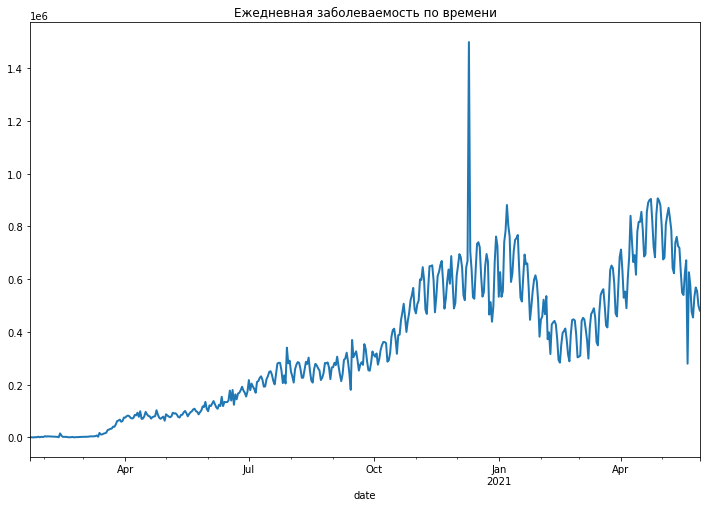

In [16]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind = 'line',
    figsize = (12,8),
    title = 'Ежедневная заболеваемость по времени',
    grid = False,
    lw = 2
)


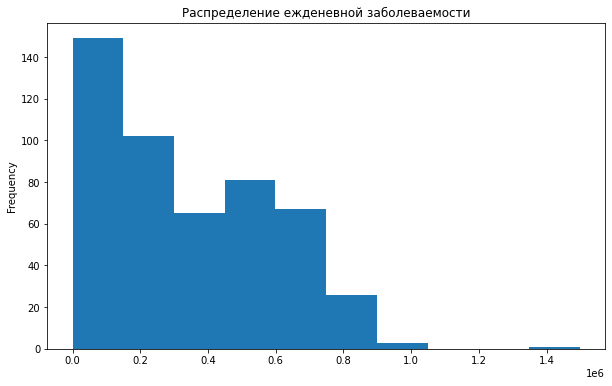

In [17]:
grouped_cases.plot(
    kind = 'hist',
    figsize = (10,6),
    title = 'Распределение ежденевной заболеваемости',
    grid = False,
    bins = 10
);